In [1]:
!rm -rf Stanford_Online_Products/

In [2]:
#Database
!gdown 1TclrpQOF_ullUP99wk_gjGN8pKvtErG8 -O Stanford_Online_Products.zip
!unzip Stanford_Online_Products.zip
!rm -rf Stanford_Online_Products.zip

Streaming output truncated to the last 5000 lines.
  inflating: Stanford_Online_Products/mug_final/391217829475_4.JPG  
  inflating: Stanford_Online_Products/mug_final/271927317253_2.JPG  
  inflating: Stanford_Online_Products/mug_final/391018865779_5.JPG  
  inflating: Stanford_Online_Products/mug_final/161559270421_5.JPG  
  inflating: Stanford_Online_Products/mug_final/171808572954_2.JPG  
  inflating: Stanford_Online_Products/mug_final/231456834036_2.JPG  
  inflating: Stanford_Online_Products/mug_final/301593961236_6.JPG  
  inflating: Stanford_Online_Products/mug_final/281765898130_0.JPG  
  inflating: Stanford_Online_Products/mug_final/271936543624_2.JPG  
  inflating: Stanford_Online_Products/mug_final/321828159456_0.JPG  
  inflating: Stanford_Online_Products/mug_final/221848708461_1.JPG  
  inflating: Stanford_Online_Products/mug_final/141739679744_0.JPG  
  inflating: Stanford_Online_Products/mug_final/151749744789_2.JPG  
  inflating: Stanford_Online_Products/mug_final/1615

In [14]:
#Requisitos
!pip install faiss-cpu
import torch
import faiss
import os
import numpy as np
from google.colab.patches import cv2_imshow
from torchvision import models
from torchvision import transforms
from google.colab import files
from PIL import Image

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean =[0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])])

In [5]:
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*(list(model.children())[:-1])) # retirar  a ultima camada da rede
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [6]:
limit = 5000
categories = ["mug_final"]
embeddings = []
paths = []
dataset_path = '/content/Stanford_Online_Products'
i =0

for category in os.listdir(dataset_path):
    if not category in categories:
      continue
    category_path = os.path.join(dataset_path,category)

    for image in os.listdir(category_path):
        if i >= limit:
          break
        if not image.lower().endswith(('.png', '.jpg', '.jpeg')):
          continue
        print("Image : " +str(i))
        i = i+1
        image_path = os.path.join(category_path,image)
        img = Image.open(image_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0)
        with torch.no_grad():
          mb = model(img_tensor).squeeze().numpy()
        paths.append(image_path)
        embeddings.append(mb)


Image : 0
Image : 1
Image : 2
Image : 3
Image : 4
Image : 5
Image : 6
Image : 7
Image : 8
Image : 9
Image : 10
Image : 11
Image : 12
Image : 13
Image : 14
Image : 15
Image : 16
Image : 17
Image : 18
Image : 19
Image : 20
Image : 21
Image : 22
Image : 23
Image : 24
Image : 25
Image : 26
Image : 27
Image : 28
Image : 29
Image : 30
Image : 31
Image : 32
Image : 33
Image : 34
Image : 35
Image : 36
Image : 37
Image : 38
Image : 39
Image : 40
Image : 41
Image : 42
Image : 43
Image : 44
Image : 45
Image : 46
Image : 47
Image : 48
Image : 49
Image : 50
Image : 51
Image : 52
Image : 53
Image : 54
Image : 55
Image : 56
Image : 57
Image : 58
Image : 59
Image : 60
Image : 61
Image : 62
Image : 63
Image : 64
Image : 65
Image : 66
Image : 67
Image : 68
Image : 69
Image : 70
Image : 71
Image : 72
Image : 73
Image : 74
Image : 75
Image : 76
Image : 77
Image : 78
Image : 79
Image : 80
Image : 81
Image : 82
Image : 83
Image : 84
Image : 85
Image : 86
Image : 87
Image : 88
Image : 89
Image : 90
Image : 9

In [7]:

embeddings_validos = []
paths_validos = []

for emb, path in zip(embeddings, paths):
    if isinstance(emb, np.ndarray) and emb.shape == (2048,):
        embeddings_validos.append(emb)
        paths_validos.append(path)



embeddings_np = np.vstack(embeddings_validos).astype('float32') # indexar os embeddings em uma estrutura que permite buscas rapidas
index = faiss.IndexFlatL2(2048)
index.add(embeddings_np)

In [17]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)
    with torch.no_grad():
        emb = model(img_tensor).squeeze().numpy()  # [2048]
    return emb.astype("float32")

def buscar_similares(query_embedding, k=5):
    D, I = index.search(query_embedding.reshape(1, -1), k)
    return I[0]  # retorna os índices dos k mais próximos

def mostrar_recomendacoes(indices):
    for idx in indices:
        image_path = paths_validos[idx]
        img = Image.open(image_path)
        cv2_imshow(np.array(img))

In [ ]:
img = files.upload()
query_embedding = preprocess_image(img)
indices_similares = buscar_similares(query_embedding, k=5)
mostrar_recomendacoes(indices_similares)


In [9]:
# Imagens de teste do material de apoio
!wget -O mug.jpg "https://github.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/raw/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg"

img2 = "/content/mug.jpg"


--2025-09-20 03:50:56--  https://github.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/raw/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg [following]
--2025-09-20 03:50:57--  https://raw.githubusercontent.com/monicaneli/Sistema_de_Recomendacao_por_Imagens/032a3f7da37068466fc9799f9622a4c41bf93434/pexels-pixabay-50676.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19052 (19K) [image/jpeg]
Saving to: ‘mug.jpg’

m

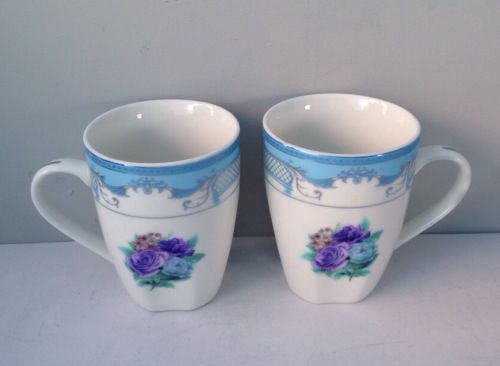

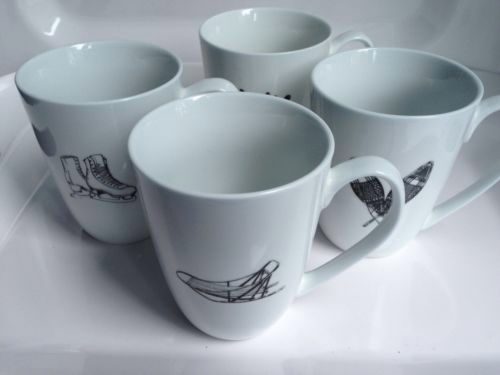

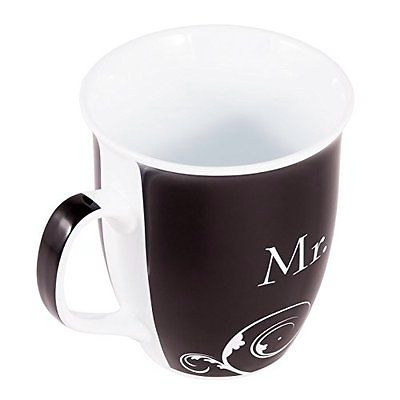

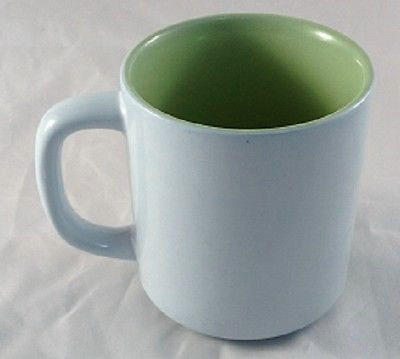

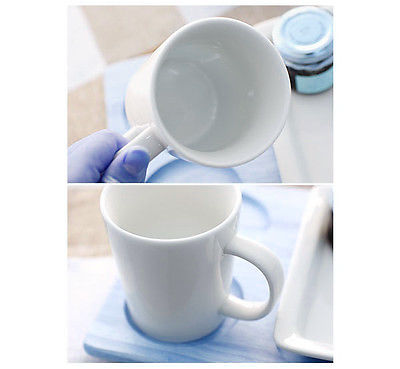

In [18]:
querry_embedding_img2 = preprocess_image(img2)

indices_similares_img2 = buscar_similares(querry_embedding_img2, k=5)

mostrar_recomendacoes(indices_similares_img2)
